# Final Project Submission

Please fill out:
* Student name: Jamaal Smith
* Student pace: Part Time
* Scheduled project review date/time: 
* Instructor name: James Irving
* Blog post URL:
* Video of 5-min Non-Technical Presentation:


# TABLE OF CONTENTS 

*Click to jump to matching Markdown Header.*<br><br>

<font size=4rem>
    
- [Introduction](#INTRODUCTION)<br>
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB](#SCRUB)**<br>
- **[EXPLORE](#EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[iNTERPRET](#iNTERPRET)**<br>
- [Conclusions/Recommendations](#CONCLUSIONS-&-RECOMMENDATIONS)<br>
</font>
___



## RESOURCES FOR YOU 
**<font color='red'>(Delete from final notebook)</font>**

- [OVERVIEW OF OSEMiN](#OVERVIEW-OF-OSEMiN)
- [PROCESS-CHECKLIST](#PROCESS-CHECKLIST)
    - Can actually keep this part if you'd like.
- [LINKS FOR MOD 1 PROJECT](#LINKS-FOR-MOD-1-PROJECT)



# RESOURCES FOR YOU
<font color='red' weight='bold'>- NOTE: DELETE THIS SECTION & SUB SECTIONS FROM YOUR FINAL NOTEBOOK</font>

### LINKS FOR MOD 1 PROJECT
* [Blog Post: 5 steps of a data science project lifecycle](https://towardsdatascience.com/5-steps-of-a-data-science-project-lifecycle-26c50372b492)
* ML models google sheet https://docs.google.com/spreadsheets/d/1qe4nYjGKSxBNCkeV2gxxgObBpKKc0TKrbk0Y9LTrpV8
* How to detect and remove outliers:
    * https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
* How to handle categorical variables. 
    * https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63
* Sci-Kit Learn’s Scalers visually explained 
    * http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html


## OVERVIEW OF OSEMiN

<img src='https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/OSEMN.png' width=800>
<center><a href="https://www.kdnuggets.com/2018/02/data-science-command-line-book-exploring-data.html"> 
    </a></center>

> <font size=4em>The Data Science Process we'll be using during this section--OSEMiN (pronounced "OH-sum", rhymes with "possum").  This is the most straightforward of the Data Science Processes discussed so far.  **Note that during this process, just like the others, the stages often blur together.***  It is completely acceptable (and ***often a best practice!) to float back and forth** between stages as you learn new things about your problem, dataset, requirements, etc.  
It's quite common to get to the modeling step and realize that you need to scrub your data a bit more or engineer a different feature and jump back to the "Scrub" stage, or go all the way back to the "Obtain" stage when you realize your current data isn't sufficient to solve this problem. 
As with any of these frameworks, *OSEMiN is meant to be treated as guidelines, not law. 
</font>


### OSEMN DETAILS


**OBTAIN**

- This step involves understanding stakeholder requirements, gathering information on the problem, and finally sourcing data that we think will be necessary for solving this problem. 

**SCRUB**

- During this stage, we'll focus on preprocessing our data.  Important steps such as identifying and removing null values, dealing with outliers, normalizing data, and feature engineering/feature selection are handled around this stage.  The line with this stage really blurs with the _Explore_ stage, as it is common to only realize that certain columns require cleaning or preprocessing as a result of the visualzations and explorations done during Step 3.  

- Note that although technically, categorical data should be one-hot encoded during this step, in practice, it's usually done after data exploration.  This is because it is much less time-consuming to visualize and explore a few columns containing categorical data than it is to explore many different dummy columns that have been one-hot encoded. 

**EXPLORE**

- This step focuses on getting to know the dataset you're working with. As mentioned above, this step tends to blend with the _Scrub_ step mentioned above.  During this step, you'll create visualizations to really get a feel for your dataset.  You'll focus on things such as understanding the distribution of different columns, checking for multicollinearity, and other tasks liek that.  If your project is a classification task, you may check the balance of the different classes in your dataset.  If your problem is a regression task, you may check that the dataset meets the assumptions necessary for a regression task.  

- At the end of this step, you should have a dataset ready for modeling that you've thoroughly explored and are extremely familiar with.  

**MODEL**

- This step, as with the last two frameworks, is also pretty self-explanatory. It consists of building and tuning models using all the tools you have in your data science toolbox.  In practice, this often means defining a threshold for success, selecting machine learning algorithms to test on the project, and tuning the ones that show promise to try and increase your results.  As with the other stages, it is both common and accepted to realize something, jump back to a previous stage like _Scrub_ or _Explore_, and make some changes to see how it affects the model.  

**iNTERPRET**

- During this step, you'll interpret the results of your model(s), and communicate results to stakeholders.  As with the other frameworks, communication is incredibily important! During this stage, you may come to realize that further investigation is needed, or more data.  That's totally fine--figure out what's needed, go get it, and start the process over! If your results are satisfactory to all stakeholders involved, you may also go from this stage right into productionizing your model and automating processes necessary to support it.  



<font color='red'>Note: Delete this markdown cell from your final project notebook</font>

## PROCESS CHECKLIST


> Keep in mind that it is normal to jump between the OSEMN phases and some of them will blend together, like SCRUB and EXPLORE.

1. **[OBTAIN](#OBTAIN)**
    - Import data, inspect, check for datatypes to convert and null values
    - Display header and info.
    - Drop any unneeded columns, if known (`df.drop(['col1','col2'],axis=1,inplace=True`)
    <br><br>

2. **[SCRUB](#SCRUB)**
    - Recast data types, identify outliers, check for multicollinearity, normalize data**
    - Check and cast data types
        - [ ] Check for #'s that are store as objects (`df.info()`,`df.describe()`)
            - when converting to #'s, look for odd values (like many 0's), or strings that can't be converted.
            - Decide how to deal weird/null values (`df.unique()`, `df.isna().sum()`)
            - `df.fillna(subset=['col_with_nulls'],'fill_value')`, `df.replace()`
        - [ ] Check for categorical variables stored as integers.
            - May be easier to tell when you make a scatter plotm or `pd.plotting.scatter_matrix()`
            
    - [ ] Check for missing values  (df.isna().sum())
        - Can drop rows or colums
        - For missing numeric data with median or bin/convert to categorical
        - For missing categorical data: make NaN own category OR replace with most common category
    - [ ] Check for multicollinearity
        - Use seaborn to make correlation matrix plot 
        - Good rule of thumb is anything over 0.75 corr is high, remove the variable that has the most correl with the largest # of variables
    - [ ] Normalize data (may want to do after some exploring)
        - Most popular is Z-scoring (but won't fix skew) 
        - Can log-transform to fix skewed data
    
3. **[EXPLORE](#EXPLORE)**
    - [ ] Check distributions, outliers, etc**
    - [ ] Check scales, ranges (df.describe())
    - [ ] Check histograms to get an idea of distributions (df.hist()) and data transformations to perform.
        - Can also do kernel density estimates
    - [ ] Use scatter plots to check for linearity and possible categorical variables (`df.plot("x","y")`)
        - categoricals will look like vertical lines
    - [ ] Use `pd.plotting.scatter_matrix(df)` to visualize possible relationships
    - [ ] Check for linearity.
   
4. **[MODEL](#MODEL)**

    - **Fit an initial model:** 
        - Run an initial model and get results

    - **Holdout validation / Train/test split**
        - use sklearn `train_test_split`
    
5. **[iNTERPRET](#iNTERPRET)**
    - **Assessing the model:**
        - Assess parameters (slope,intercept)
        - Check if the model explains the variation in the data (RMSE, F, R_square)
        - *Are the coeffs, slopes, intercepts in appropriate units?*
        - *Whats the impact of collinearity? Can we ignore?*
        <br><br>
    - **Revise the fitted model**
        - Multicollinearity is big issue for lin regression and cannot fully remove it
        - Use the predictive ability of model to test it (like R2 and RMSE)
        - Check for missed non-linearity
        
- **Interpret final model and draw >=3 conclusions and recommendations from dataset**

# <font color='red'> START YOUR CODE BELOW:</font>

# INTRODUCTION

> Explain the point of your project and what question you are trying to answer with your modeling.



# OBTAIN

In [272]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

data = pd.read_csv('kc_house_data.csv')

In [273]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# SCRUB

In [274]:
data = data.dropna()

In [275]:
data.date = pd.to_datetime(data['date'])
data['sqft_basement1'] = pd.to_numeric(data['sqft_basement'],errors='coerce')
data.dropna()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement1
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,400.0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,910.0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,1530.0
8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113,730.0
9,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570,0.0
11,9212900260,2014-05-27,468000.0,2,1.00,1160,6000,1.0,0.0,0.0,...,860,300.0,1942,0.0,98115,47.6900,-122.292,1330,6000,300.0
13,6054650070,2014-10-07,400000.0,3,1.75,1370,9680,1.0,0.0,0.0,...,1370,0.0,1977,0.0,98074,47.6127,-122.045,1370,10208,0.0
14,1175000570,2015-03-12,530000.0,5,2.00,1810,4850,1.5,0.0,0.0,...,1810,0.0,1900,0.0,98107,47.6700,-122.394,1360,4850,0.0
15,9297300055,2015-01-24,650000.0,4,3.00,2950,5000,2.0,0.0,3.0,...,1980,970.0,1979,0.0,98126,47.5714,-122.375,2140,4000,970.0


In [276]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement1
count,1.576200e+04,1.576200e+04,15762.000000,15762.000000,15762.000000,1.576200e+04,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15429.000000
mean,4.593364e+09,5.413172e+05,3.378949,2.120797,2084.512372,1.528082e+04,1.495147,0.007613,0.229984,3.410862,7.663748,1792.775473,1971.111217,82.440236,98077.558241,47.559177,-122.213520,1990.219579,12900.415556,291.811329
std,2.876078e+09,3.722258e+05,0.935301,0.766772,918.617686,4.182288e+04,0.539352,0.086924,0.761324,0.651961,1.172238,828.403502,29.336823,397.212626,53.414906,0.138629,0.140706,684.142495,27977.230059,443.366153
min,1.000102e+06,8.200000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000,0.000000
25%,2.125159e+09,3.210000e+05,3.000000,1.750000,1430.000000,5.048500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,1952.000000,0.000000,98033.000000,47.469200,-122.328000,1490.000000,5100.000000,0.000000
50%,3.905081e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.602000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1570.000000,1975.000000,0.000000,98065.000000,47.571000,-122.229000,1846.000000,7620.000000,0.000000
75%,7.334501e+09,6.448750e+05,4.000000,2.500000,2550.000000,1.072000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,1997.000000,0.000000,98117.000000,47.677400,-122.124000,2370.000000,10107.500000,560.000000
max,9.895000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,4820.000000


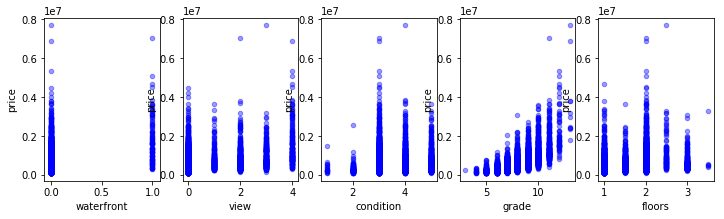

In [277]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(12,3))

for xcol, ax in zip(['waterfront','view', 'condition','grade','floors'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

In [278]:
data[['waterfront','view', 'condition','grade']].nunique()

waterfront     2
view           5
condition      5
grade         11
dtype: int64

In [279]:
waterfront_dummies = pd.get_dummies(data['waterfront'], prefix = 'wat',drop_first=True)
view_dummies = pd.get_dummies(data['view'], prefix = 'view', drop_first=True)
condition_dummies = pd.get_dummies(data['condition'], prefix = 'cond', drop_first=True)
floor_dummies = pd.get_dummies(data['floors'],prefix = 'floor',drop_first=True)



In [280]:
data = pd.concat([data,waterfront_dummies,view_dummies,condition_dummies,floor_dummies], axis=1)
data = data.drop(['waterfront','view','condition','grade','id','floors'],axis=1)

# Multicollinarity

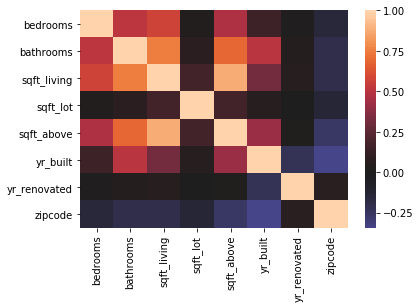

In [281]:
data_pred = data.iloc[:,2:11]
import seaborn as sns
sns.heatmap(data_pred.corr(), center=0);

In [282]:
abs(data_pred.corr()) > 0.75

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,yr_renovated,zipcode
bedrooms,True,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False
sqft_living,False,True,True,False,True,False,False,False
sqft_lot,False,False,False,True,False,False,False,False
sqft_above,False,False,True,False,True,False,False,False
yr_built,False,False,False,False,False,True,False,False
yr_renovated,False,False,False,False,False,False,True,False
zipcode,False,False,False,False,False,False,False,True


# EXPLORE

C:\anaconda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


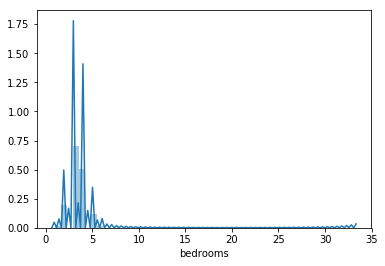

In [283]:
sns.distplot(data['bedrooms'])

C:\anaconda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


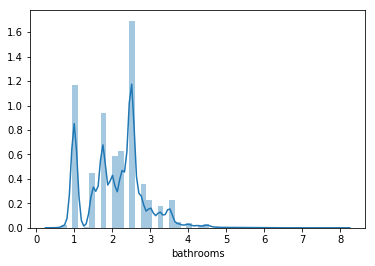

In [284]:
ax2 = sns.distplot(data['bathrooms'])

C:\anaconda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


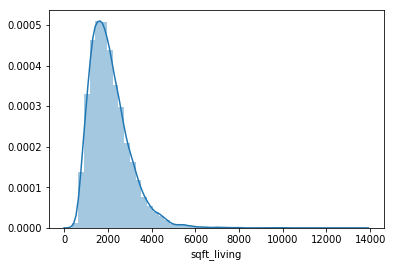

In [285]:
ax3 = sns.distplot(data['sqft_living'])

C:\anaconda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


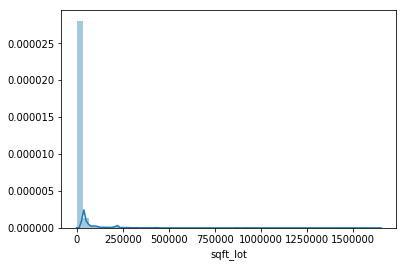

In [286]:
ax4 = sns.distplot(data['sqft_lot'])

C:\anaconda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


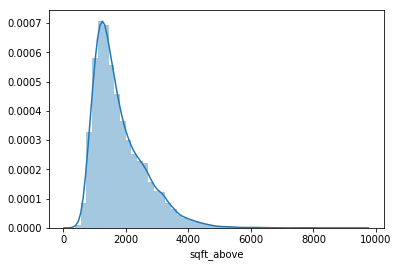

In [287]:
ax6 = sns.distplot(data['sqft_above'])

C:\anaconda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


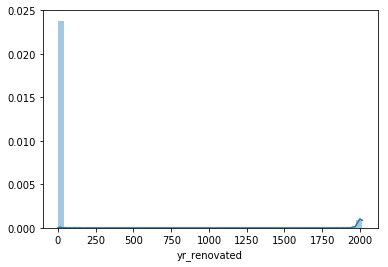

In [288]:
ax7 = sns.distplot(data['yr_renovated'])

C:\anaconda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


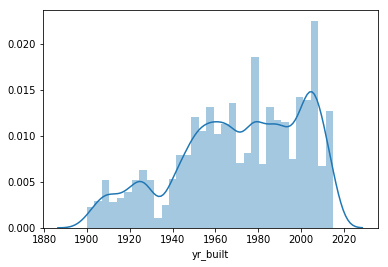

In [289]:
ax8 = sns.distplot(data['yr_built'])

C:\anaconda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


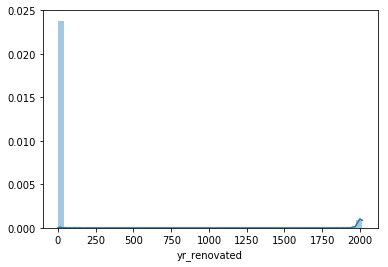

In [290]:
ax9 = sns.distplot(data['yr_renovated'])

# Replacing values

C:\anaconda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


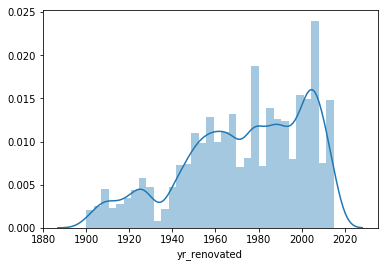

In [291]:
data['yr_renovated'] = data.yr_renovated.replace(0,data['yr_built'])
sns.distplot(data['yr_renovated'])

# Log Transformations

C:\anaconda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


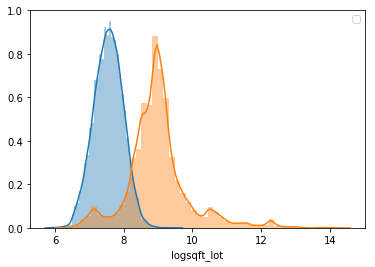

In [294]:
data['logsqft_living'] = np.log(data['sqft_living'])
data['logsqft_lot'] = np.log(data['sqft_lot'])
data['logyr_built'] = np.log(data['yr_built'])

sns.distplot(data['logsqft_living'])
sns.distplot(data['logsqft_lot'])
plt.legend()

C:\anaconda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


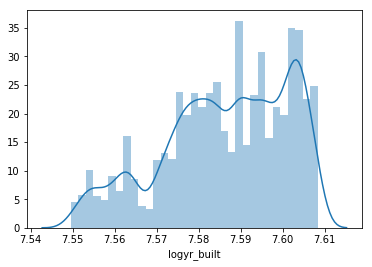

In [295]:
sns.distplot(data['logyr_built'])

# MODEL

In [310]:
data_fin = pd.DataFrame([])
data_fin['sqft_lot'] = data['logsqft_lot']
data_fin['sqft_living'] = data['logsqft_living']
data_fin['sqftliving_15'] = data['sqft_living15']
data_fin['sqftlot_15'] = data['sqft_lot15']
data_fin['bedrooms'] = data['bedrooms']
data_fin['bathrooms'] = data['bathrooms']
data_fin['yr_built'] = data['logyr_built']
data_fin['renovated'] = data['yr_renovated']
price = data['price']
data_ols = pd.concat([price, data_fin,waterfront_dummies,view_dummies,condition_dummies,floor_dummies], axis=1)

In [311]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

outcome = 'price'
predictors = data_ols.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum


In [317]:
model = sm.OLS(price,data_ols)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.326e+32
Date:                Thu, 14 Nov 2019   Prob (F-statistic):               0.00
Time:                        01:45:50   Log-Likelihood:             3.1028e+05
No. Observations:               15762   AIC:                        -6.205e+05
Df Residuals:                   15739   BIC:                        -6.203e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
price             1.0000   2.16e-17   4.62e+16

# iNTERPRET

# CONCLUSIONS & RECOMMENDATIONS

> Summarize your conclusions and bullet-point your list of recommendations, which are based on your modeling results.